Loaded data from ../compare_compare_results.json
Loaded 2 rows with numeric owners_value
                  count      mean            std       min        25%  \
updated_recently                                                        
True                2.0  952645.5  263969.325378  765991.0  859318.25   

                       50%         75%        max  
updated_recently                                   
True              952645.5  1045972.75  1139300.0  
Saved boxplot to compare_boxplot.png
Saved summary to compare_summary.csv


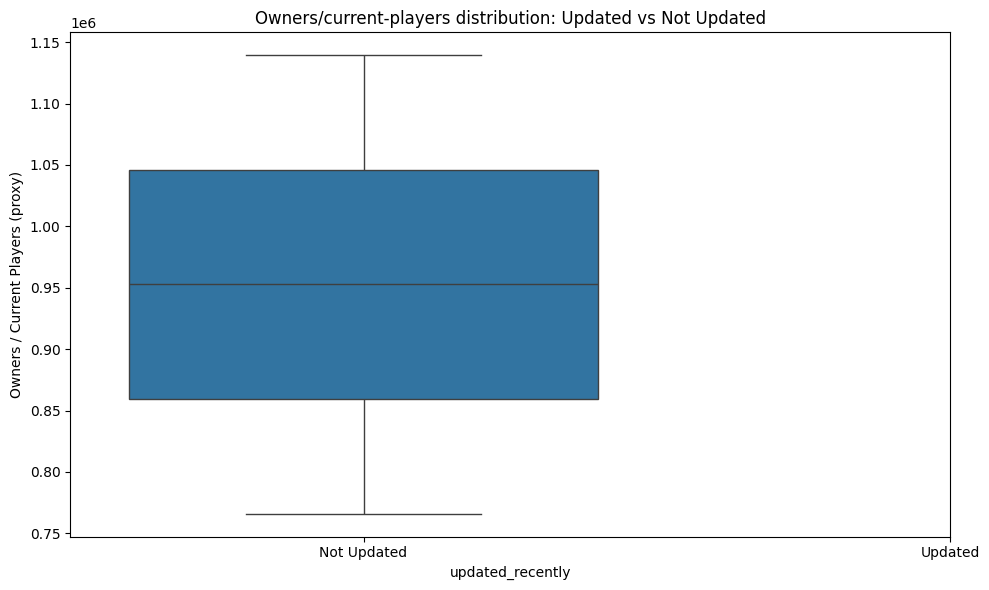

In [2]:
import json
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Try multiple likely paths for the compare results JSON (fall back if different name was used)
paths = ['../compare_results.json', '../compare_compare_results.json', 'compare_results.json', 'compare_compare_results.json']
data = None
for path in paths:
    if os.path.exists(path):
        with open(path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        print(f'Loaded data from {path}')
        break
if data is None:
    raise FileNotFoundError(f'Please run compare_updates.py and produce one of: {paths}')

details = data.get('details', [])
df = pd.DataFrame(details)
# normalize owners_value to numeric, drop missing
df['owners_value'] = pd.to_numeric(df.get('owners_value', None), errors='coerce')
df = df.dropna(subset=['owners_value'])
if 'updated_recently' in df.columns:
    df['updated_recently'] = df['updated_recently'].astype(bool)
else:
    df['updated_recently'] = False

print('Loaded', len(df), 'rows with numeric owners_value')
print(df.groupby('updated_recently')['owners_value'].describe())

# Plot distribution
plt.figure(figsize=(10,6))
sns.boxplot(x='updated_recently', y='owners_value', data=df)
plt.xticks([0,1], ['Not Updated','Updated'])
plt.ylabel('Owners / Current Players (proxy)')
plt.title('Owners/current-players distribution: Updated vs Not Updated')
plt.tight_layout()
plot_path = 'compare_boxplot.png'
plt.savefig(plot_path)
print(f'Saved boxplot to {plot_path}')
# Save summary to CSV for quick inspection
summary = df.groupby('updated_recently')['owners_value'].describe().reset_index()
summary.to_csv('compare_summary.csv', index=False)
print('Saved summary to compare_summary.csv')
plt.show()